<a href="https://colab.research.google.com/github/sayid-alt/student-performance-factor-analysis/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Sayid_Muhammad_Heykal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gdown

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

import time
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [205]:
DRIVE_LINK = 'https://drive.google.com/file/d/1s-2UogkIzzGwrjP0rGuCWWDwXCoKDsX4/view?usp=sharing'
def fetch_dataset(drive_link=DRIVE_LINK):
  drive_link = drive_link
  file_id = drive_link.split('/')[-2]
  download_link = f'https://drive.google.com/uc?id={file_id}'

  gdown.download(download_link, 'clustering.csv')
  print(f'\nsuccessfull download {download_link}')

  df = pd.read_csv('clustering.csv', encoding='utf-8')
  return df

In [206]:
df = fetch_dataset()
df.head()

Downloading...
From: https://drive.google.com/uc?id=1s-2UogkIzzGwrjP0rGuCWWDwXCoKDsX4
To: /content/clustering.csv
100%|██████████| 642k/642k [00:00<00:00, 96.3MB/s]


successfull download https://drive.google.com/uc?id=1s-2UogkIzzGwrjP0rGuCWWDwXCoKDsX4


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [207]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

(None, (6607, 20))

To unified the indices of the columns, we'll set the all column names to the lower case

In [208]:
df.columns = df.columns.str.lower()

print(df.columns.tolist())

['hours_studied', 'attendance', 'parental_involvement', 'access_to_resources', 'extracurricular_activities', 'sleep_hours', 'previous_scores', 'motivation_level', 'internet_access', 'tutoring_sessions', 'family_income', 'teacher_quality', 'school_type', 'peer_influence', 'physical_activity', 'learning_disabilities', 'parental_education_level', 'distance_from_home', 'gender', 'exam_score']


## 4.2 Data Cleansing

This section we'll focus on cleaning the datasets. This process is to make sure that the data is clean and ready to be used in the model. The steps include the following:

1. Handling formatting of the data
2. Strategy of Handling for the missing values
3. Handling duplicates
4. Handling outliers

In [209]:
# Copy the dataset to keep the original dataframe
df_cleaned = df.copy()

In [210]:
df_cleaned['exam_score'] = df_cleaned['exam_score'].replace(101, 100)

# check for replacement
df_cleaned['exam_score'][df_cleaned['exam_score'] > 90].value_counts().reset_index().sort_values(by='exam_score', ascending=True)

,exam_score,count
8,91,1
4,92,2
7,93,2
0,94,4
6,95,2
9,96,1
1,97,3
2,98,3
5,99,2
3,100,2


**Now let's checking for the missing values!**

In [211]:
missing_values = df_cleaned.isnull().sum()
percentage_missing_values = (missing_values / df_cleaned.shape[0]) * 100

print(f'Total number of missing values: {missing_values.sum()}')
print(f'Percentage of missing values: {percentage_missing_values.sum():.2f}%\n')

missing_values_df = pd.DataFrame(percentage_missing_values[missing_values>0], columns=['percentage_missing_values'])
missing_values_df['number_of_missing_values'] = missing_values[missing_values>0]
missing_values_df

Total number of missing values: 235
Percentage of missing values: 3.56%



,percentage_missing_values,number_of_missing_values
teacher_quality,1.180566,78
parental_education_level,1.362192,90
distance_from_home,1.014076,67


**INFERENCE**<br>
There is 235 missing values, or 3.56% of the dataset. Therefore, as we seen the amount of the missing values is not high, and as considered that imputing the missing value would cause bias and inacurate data which would affect our model as well.

**STRATEGY** <br>
- Simply drop the rows with missing values

In [212]:
# Drop the null values
df_cleaned.dropna(axis=0, inplace=True)

# check for missing values
print(f'Total number of missing values: {df_cleaned.isnull().sum().sum()}')
missing_values = df_cleaned.isnull().sum()
missing_values_df = pd.DataFrame(percentage_missing_values[missing_values>0], columns=['percentage_missing_values'])
missing_values_df['number_of_missing_values'] = missing_values[missing_values>0]
missing_values_df

Total number of missing values: 0


,percentage_missing_values,number_of_missing_values


In [213]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   hours_studied               6378 non-null   int64 
 1   attendance                  6378 non-null   int64 
 2   parental_involvement        6378 non-null   object
 3   access_to_resources         6378 non-null   object
 4   extracurricular_activities  6378 non-null   object
 5   sleep_hours                 6378 non-null   int64 
 6   previous_scores             6378 non-null   int64 
 7   motivation_level            6378 non-null   object
 8   internet_access             6378 non-null   object
 9   tutoring_sessions           6378 non-null   int64 
 10  family_income               6378 non-null   object
 11  teacher_quality             6378 non-null   object
 12  school_type                 6378 non-null   object
 13  peer_influence              6378 non-null   object
 1

## 4.2 Distribution and Correlation

In [214]:
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

print(f'Number of features: {len(categorical_cols) + len(numerical_cols)}')
print(f'Number of numerical features: {len(numerical_cols)}')
print(f'Number of categorical features: {len(categorical_cols)}\n')
print(f'List of categorical features:\n{categorical_cols}\n')
print(f'list of numerical features:\n{numerical_cols}')

Number of features: 20
Number of numerical features: 7
Number of categorical features: 13

List of categorical features:
['parental_involvement', 'access_to_resources', 'extracurricular_activities', 'motivation_level', 'internet_access', 'family_income', 'teacher_quality', 'school_type', 'peer_influence', 'learning_disabilities', 'parental_education_level', 'distance_from_home', 'gender']

list of numerical features:
['hours_studied', 'attendance', 'sleep_hours', 'previous_scores', 'tutoring_sessions', 'physical_activity', 'exam_score']


In [215]:
df_cleaned[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
hours_studied,6378.0,19.977109,5.985460,1.0,16.0,20.0,24.0,44.0
attendance,6378.0,80.020853,11.550723,60.0,70.0,80.0,90.0,100.0
sleep_hours,6378.0,7.034964,1.468033,4.0,6.0,7.0,8.0,10.0
previous_scores,6378.0,75.066165,14.400389,50.0,63.0,75.0,88.0,100.0
tutoring_sessions,6378.0,1.495296,1.233984,0.0,1.0,1.0,2.0,8.0
physical_activity,6378.0,2.972719,1.028926,0.0,2.0,3.0,4.0,6.0
exam_score,6378.0,67.251960,3.912884,55.0,65.0,67.0,69.0,100.0


**Inferences**
- there is s score `101` in the column. which we can say that as misinputed, the values should be less than 100.

**Strategy**
- We'll consider the score `101` is misinputed value, so the only possible way is to replace it with 100.

In [216]:
df_cleaned[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
hours_studied,6378.0,19.977109,5.985460,1.0,16.0,20.0,24.0,44.0
attendance,6378.0,80.020853,11.550723,60.0,70.0,80.0,90.0,100.0
sleep_hours,6378.0,7.034964,1.468033,4.0,6.0,7.0,8.0,10.0
previous_scores,6378.0,75.066165,14.400389,50.0,63.0,75.0,88.0,100.0
tutoring_sessions,6378.0,1.495296,1.233984,0.0,1.0,1.0,2.0,8.0
physical_activity,6378.0,2.972719,1.028926,0.0,2.0,3.0,4.0,6.0
exam_score,6378.0,67.251960,3.912884,55.0,65.0,67.0,69.0,100.0


**==== Inference ====:**<br>
As the describe output shows that numerical columns can be inferenced as follows:<br>
There is the high gap between values of q3 (75%) and max value in columns:

  - **Hours_Studied**: Third quartile is 24, and max value is 44. where the data can be said as skewed
  - **Tutoring_Sessions**: As the third quartile has a high gap between the max value, the data can be said as skewed.
  - **Exam_Score**: the max values is 101, indicates the false input which the max should not be greater than 100. and as the third quartile is 67 has a higher gap to the max values.

For further analysis let's plot the histogram, so we can clearly see the distribution of each columns
  

The `tutoring_sessions` and the `exam_scores` shows the higher gap between median of 75% data or third quartile and the max. This indicates the skewed distribution of the data. Either the data between Q3 and max are very small distribution which the possibilities might happened as follow:
- The `tutoring scores` are tend to be small distribution as the value get higher, means that the students are more likely to have a short amount of tutoring sessions.
- The `exam_scores` are also tend to be small distribution as the value get higher, means that the students that get the higher score is a little amount. This might have a correlation between student whom take more tutoring sessions.

For further inferences, let's plot the correlation beteween those features

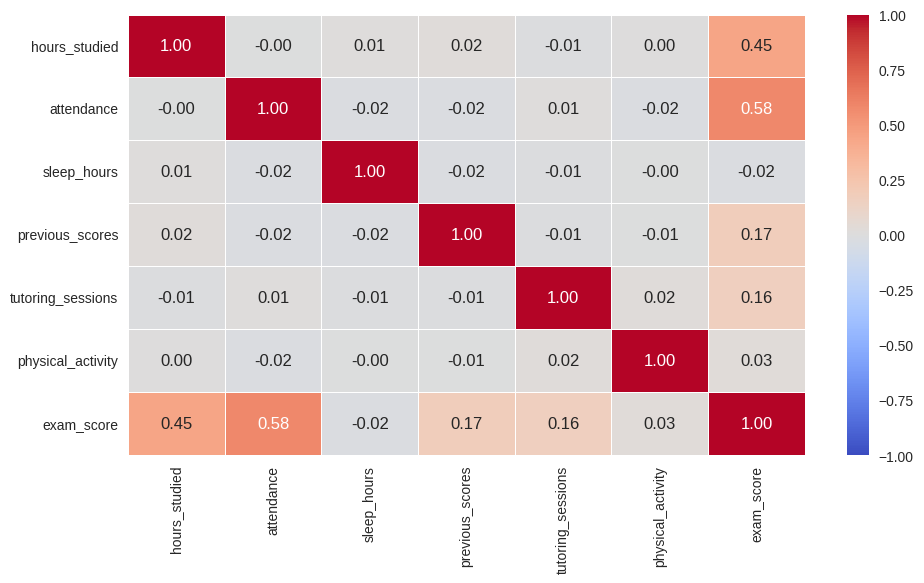

In [217]:
numerical_corr = df_cleaned[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f',vmax=1, vmin=-1)
plt.tight_layout()
plt.show()

This is interesing one. The correlation between numerical features are not too strong, except the correlation between exam_score with attendance, previous scores, tutoring sessions. has a higher positive correlation between them. The `tutoring_sessions` has a positive correlation between `exam_score`with `0.16`. This might not be a strong correlation as we see the value. But it's more correlated than the other features. And new discovering that column `attendance` has the strong correlation to `exam_score`

In [218]:
# check deeper to the distribution of exam score
print(f'Distribution of exam score: ')
df_cleaned['exam_score'].value_counts().reset_index().sort_values(by='exam_score', ascending=True)

Distribution of exam score: 


,exam_score,count
42,55,1
43,56,1
21,57,4
17,58,21
16,59,39
14,60,75
11,61,166
10,62,261
8,63,350
6,64,478


In [219]:
print(f'Distribution of tutoring_sessions:\n {df_cleaned["tutoring_sessions"].value_counts().reset_index().sort_values(by="tutoring_sessions", ascending=True)}')

Distribution of tutoring_sessions:
    tutoring_sessions  count
2                  0   1458
0                  1   2111
1                  2   1586
3                  3    800
4                  4    296
5                  5    101
6                  6     18
7                  7      7
8                  8      1


As we can see the higher tutoring sessions tends to lower the number of students. This may happend because some students have a higher motivation or they are need the tutoring sessions the most

In [220]:
def dist_plot(df, cols, types='hist'):
    ncols = 4
    nrows = len(cols) // ncols + 1

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*4))
    axes = axes.flatten() # flatten the axes for indices

    for i, col in enumerate(cols):
        if types == 'hist':
            sns.histplot(df, x=col, ax=axes[i], kde=True)
        elif types == 'box':
            sns.boxplot(df, x=col, ax=axes[i])
        axes[i].set_title(f'{col} distribution')
        axes[i].set_xlabel(col)

    plt.tight_layout()
    plt.show()

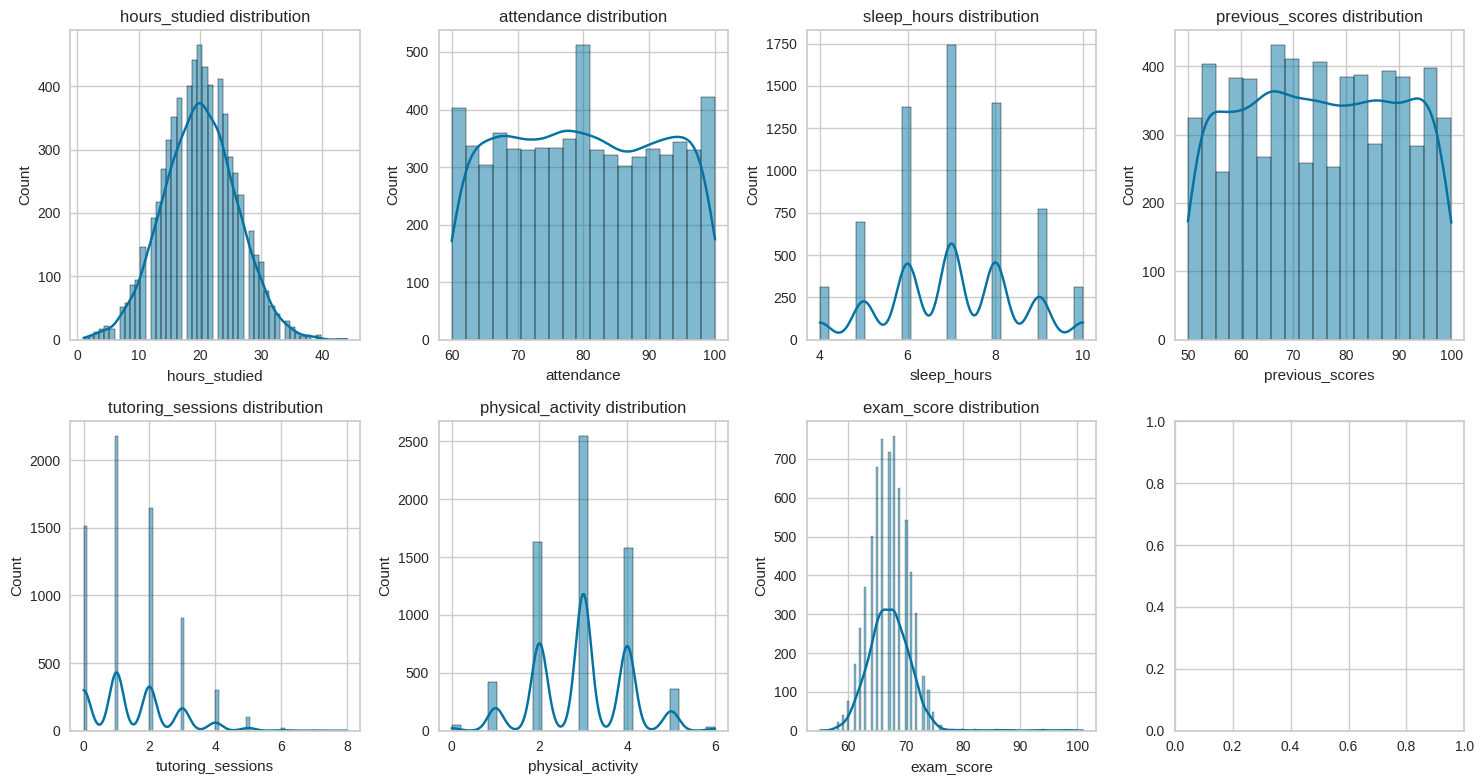

In [221]:
dist_plot(df, numerical_cols)

As we said that `tutoring_sessions` and `exam_score` are have high gap between values of q3 (75%) and max value. We need to know further if there is the value between the gap or there is an absent value between them. Another meaning is that the value is existed between the gap, but just the litle amount of values.

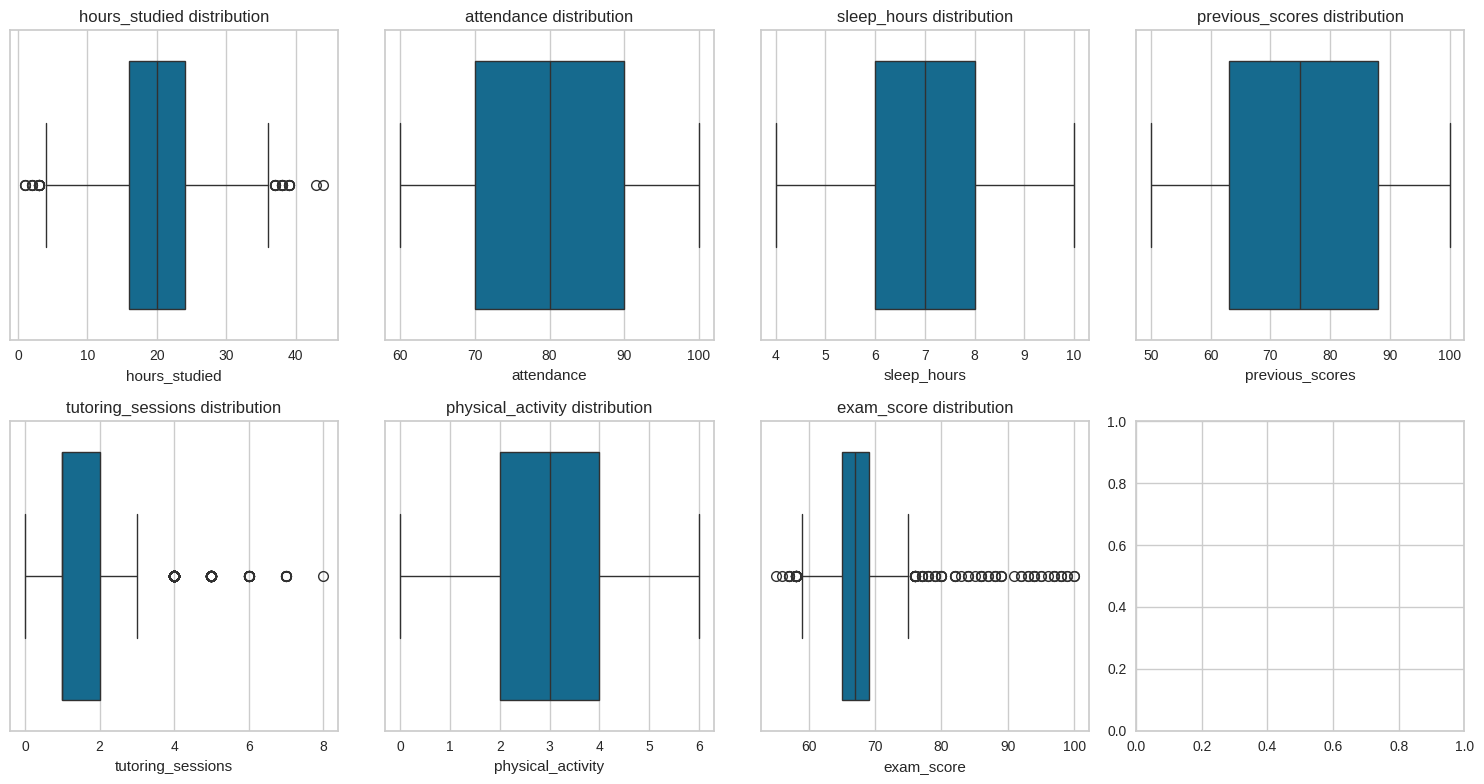

In [222]:
dist_plot(df_cleaned, numerical_cols, types='box')

There is some columns indicated as an outlier values. We have an option to handle this.
1. Drop the outlier values, This might not be a good idea. Because it's potentially to remove the valuable information. which the outliers here are occurs as the different type of student behaviours.
2. Normalize or scalling the features

However, we'll normalize them or scaled them in the data preprocessing.

In [223]:
desc_categorical = df_cleaned[categorical_cols].describe().T
desc_categorical['freq_percentage(%)'] = desc_categorical['freq'] / df_cleaned.shape[0] * 100
desc_categorical

,count,unique,top,freq,freq_percentage(%)
parental_involvement,6378,3,Medium,3251,50.972092
access_to_resources,6378,3,Medium,3204,50.235183
extracurricular_activities,6378,2,Yes,3807,59.689558
motivation_level,6378,3,Medium,3237,50.752587
internet_access,6378,2,Yes,5893,92.395735
family_income,6378,3,Low,2582,40.48291
teacher_quality,6378,3,Medium,3826,59.987457
school_type,6378,2,Public,4434,69.520226
peer_influence,6378,3,Positive,2553,40.028222
learning_disabilities,6378,2,No,5710,89.526497


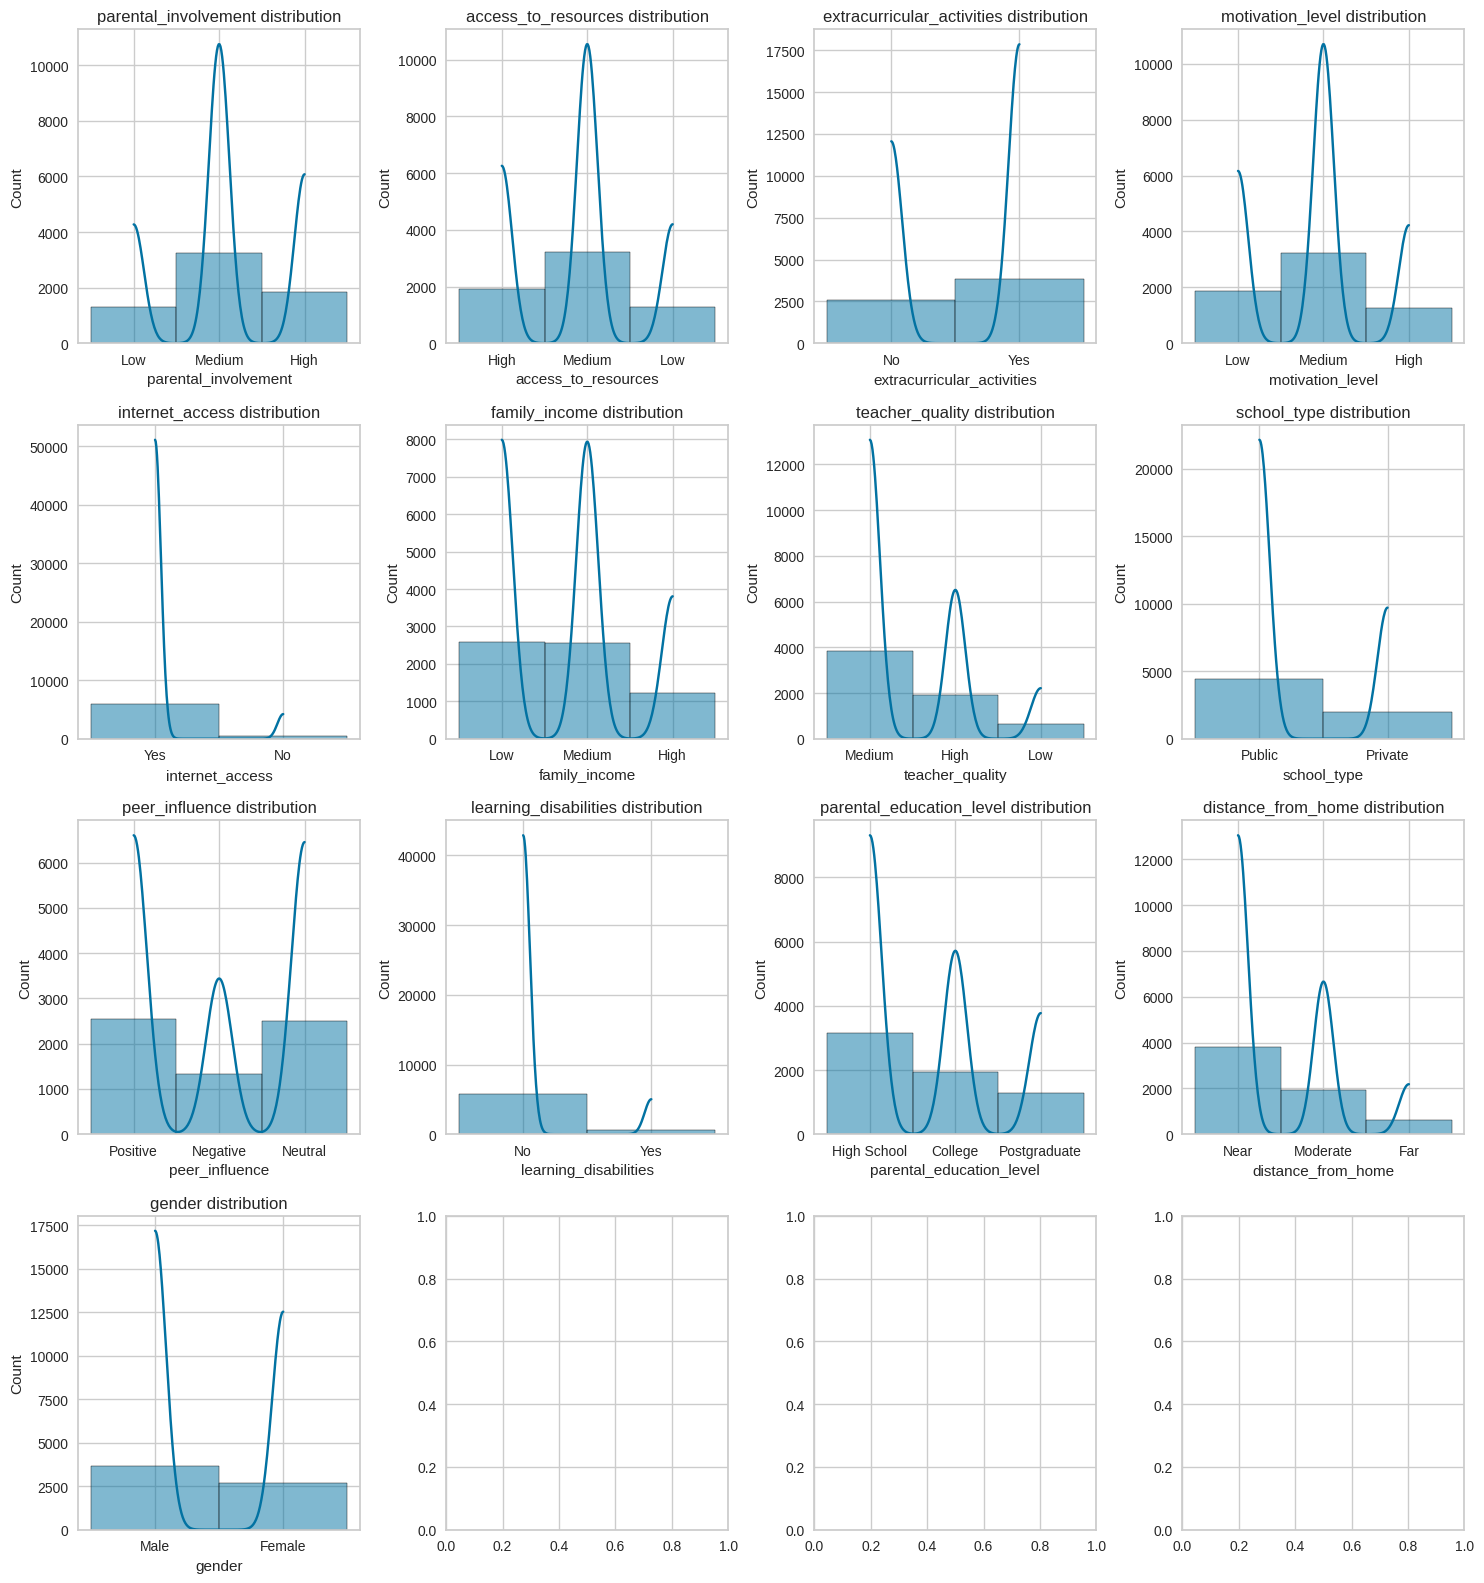

In [224]:
dist_plot(df_cleaned, categorical_cols)

In [225]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   hours_studied               6378 non-null   int64 
 1   attendance                  6378 non-null   int64 
 2   parental_involvement        6378 non-null   object
 3   access_to_resources         6378 non-null   object
 4   extracurricular_activities  6378 non-null   object
 5   sleep_hours                 6378 non-null   int64 
 6   previous_scores             6378 non-null   int64 
 7   motivation_level            6378 non-null   object
 8   internet_access             6378 non-null   object
 9   tutoring_sessions           6378 non-null   int64 
 10  family_income               6378 non-null   object
 11  teacher_quality             6378 non-null   object
 12  school_type                 6378 non-null   object
 13  peer_influence              6378 non-null   object
 1

In [226]:
df_cleaned.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hours_studied,6378.0,NaN,NaN,NaN,19.977109,5.98546,1.0,16.0,20.0,24.0,44.0
attendance,6378.0,NaN,NaN,NaN,80.020853,11.550723,60.0,70.0,80.0,90.0,100.0
parental_involvement,6378,3,Medium,3251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
access_to_resources,6378,3,Medium,3204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extracurricular_activities,6378,2,Yes,3807,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sleep_hours,6378.0,NaN,NaN,NaN,7.034964,1.468033,4.0,6.0,7.0,8.0,10.0
previous_scores,6378.0,NaN,NaN,NaN,75.066165,14.400389,50.0,63.0,75.0,88.0,100.0
motivation_level,6378,3,Medium,3237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internet_access,6378,2,Yes,5893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tutoring_sessions,6378.0,NaN,NaN,NaN,1.495296,1.233984,0.0,1.0,1.0,2.0,8.0


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

## **5.1. Checking Duplicated**

In [227]:
total_duplicated = df_cleaned.duplicated().sum()

if total_duplicated > 0:
    print(f'total duplicated rows: {total_duplicated}')
else:
    print(f'total duplicated rows: {total_duplicated}')
    print(f'No duplicated rows!')

total duplicated rows: 0
No duplicated rows!


## **5.2 Handling Outliers**

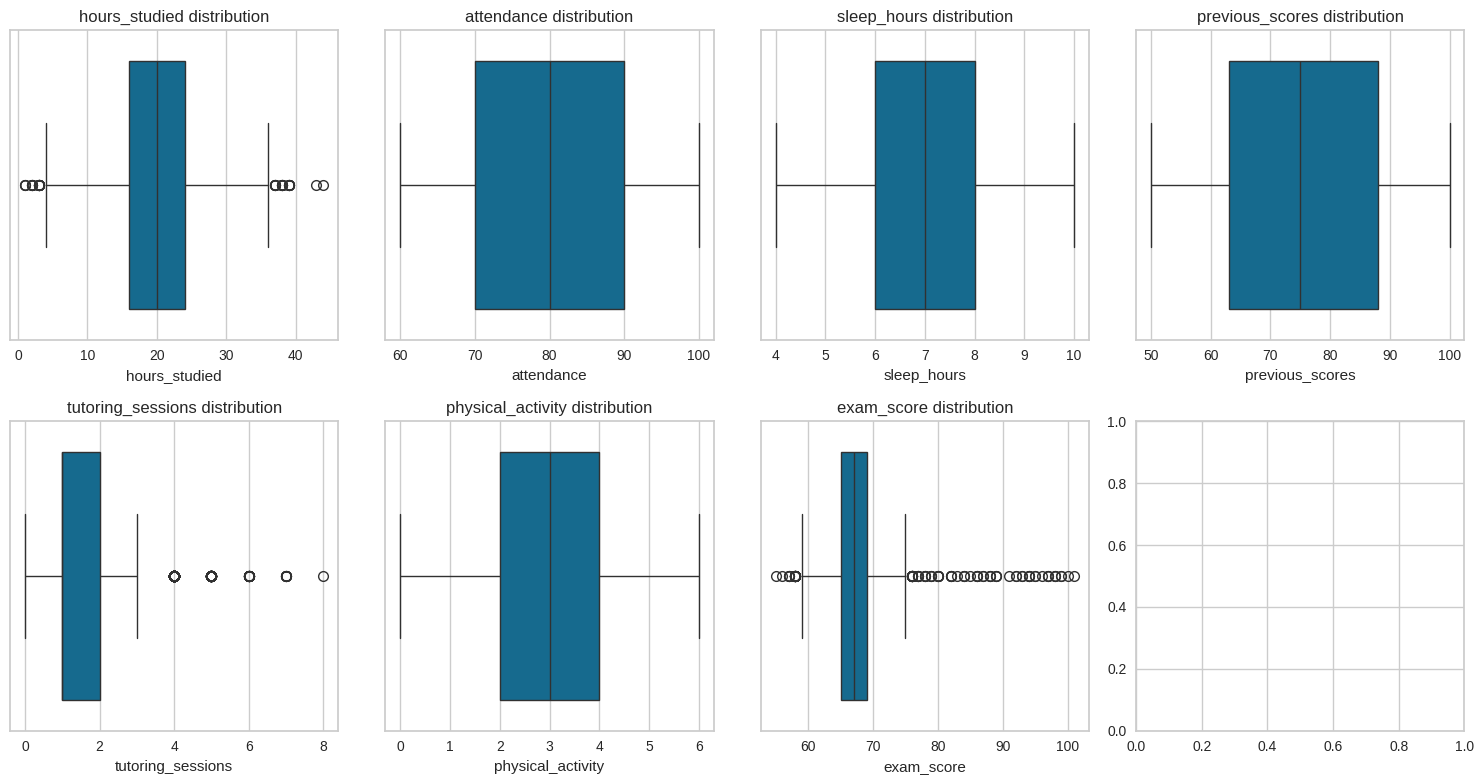

In [228]:
dist_plot(df, numerical_cols, types='box')

Outliers on numerical features above is indicated for `tutoring_sessions`, `exam_score`, and `hours_studied` due to various demography of students. This may require necessery actions to handle it in the right way. Say if we want to remove it, it would be removed some important demography information.

**STRATEGY**<br>
- Convert the numerical features to the categorical features with binning method. Reasons for this, that the information we need is just the cluster the spesific characteristics of students, not the detail of their scores. so we can group the students with score in range of 70-79 as `B` indicator, and so on.
- Here we'll use the For the `exam_score` `cut` method. to binning the numerical features to the categorical features.
    - exam_score  80 – 100 = A
    - exam_score  70 – 79 = B
    - exam_score  60 – 69 = C
    - exam_score  60 = D
- For the `hours_studied` we'll use the `cut` metdoh as well. And we'll divide them as follows:
    - hours_studided < 10 = low
    - hours_studided < 30 = medium
    - hours_studided > 30 = high
- We'll use for the `tutoring_sessions` cut method as well. And we'll divide them as follows:
    - tutoring_sessions < 2 = low
    - tutoring_sessions < 6 = medium
    - tutoring_sessions > 6 = high
- The result of the binning would become the category datatype, we should convert it back to object datatype for unified data type.

Updated categorical columns: ['parental_involvement', 'access_to_resources', 'extracurricular_activities', 'motivation_level', 'internet_access', 'family_income', 'teacher_quality', 'school_type', 'peer_influence', 'learning_disabilities', 'parental_education_level', 'distance_from_home', 'gender', 'hours_studied_indicator', 'exam_score_indicator', 'tutoring_sessions_indicator']


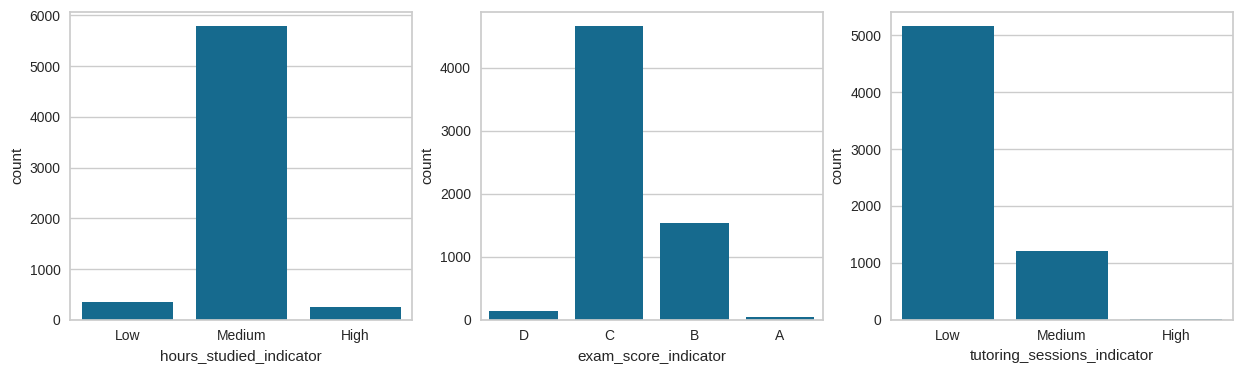

In [229]:
# set binning and store in new columns labeled as indocator
df_cleaned['exam_score_indicator'] = pd.cut(df_cleaned['exam_score'], bins=[-1, 60, 69, 79, 100], labels=['D', 'C', 'B', 'A'])
df_cleaned['hours_studied_indicator'] = pd.cut(df_cleaned['hours_studied'], bins=[-1, 10, 30, 60], labels=['Low', 'Medium', 'High'])
df_cleaned['tutoring_sessions_indicator'] = pd.cut(df_cleaned['tutoring_sessions'], bins=[-1, 2, 6, 10], labels=['Low', 'Medium', 'High'])

# show the distribution of the new categorical columns
fig, axes = plt.subplots(figsize=(15, 4), nrows=1, ncols=3)
axes = axes.flatten()

for i, col in enumerate(['hours_studied_indicator', 'exam_score_indicator', 'tutoring_sessions_indicator']):
    sns.countplot(x=col, data=df_cleaned, ax=axes[i])


# Update the categorical columns list
new_categorical_cols = ['hours_studied_indicator', 'exam_score_indicator', 'tutoring_sessions_indicator']
for new_col in new_categorical_cols:
    categorical_cols.append(new_col)
print(f'Updated categorical columns: {categorical_cols}')

# convert category datatype to object
for col in df_cleaned[categorical_cols].select_dtypes(['category']).columns:
    df_cleaned[col] = df_cleaned[col].astype('object')

In [230]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   hours_studied                6378 non-null   int64 
 1   attendance                   6378 non-null   int64 
 2   parental_involvement         6378 non-null   object
 3   access_to_resources          6378 non-null   object
 4   extracurricular_activities   6378 non-null   object
 5   sleep_hours                  6378 non-null   int64 
 6   previous_scores              6378 non-null   int64 
 7   motivation_level             6378 non-null   object
 8   internet_access              6378 non-null   object
 9   tutoring_sessions            6378 non-null   int64 
 10  family_income                6378 non-null   object
 11  teacher_quality              6378 non-null   object
 12  school_type                  6378 non-null   object
 13  peer_influence               6378 non-

## **5.2 Scaling**

Before the features feed into the model, we need to do some preprocessing of features. Which we'll do as follows:
* The numerical features has to be scaled to the same distribution in order to make a data more robust to feed into machine learning model.
* The categorical columns need to be encoded. Because the model machine learning requires the data to be in numerical form.

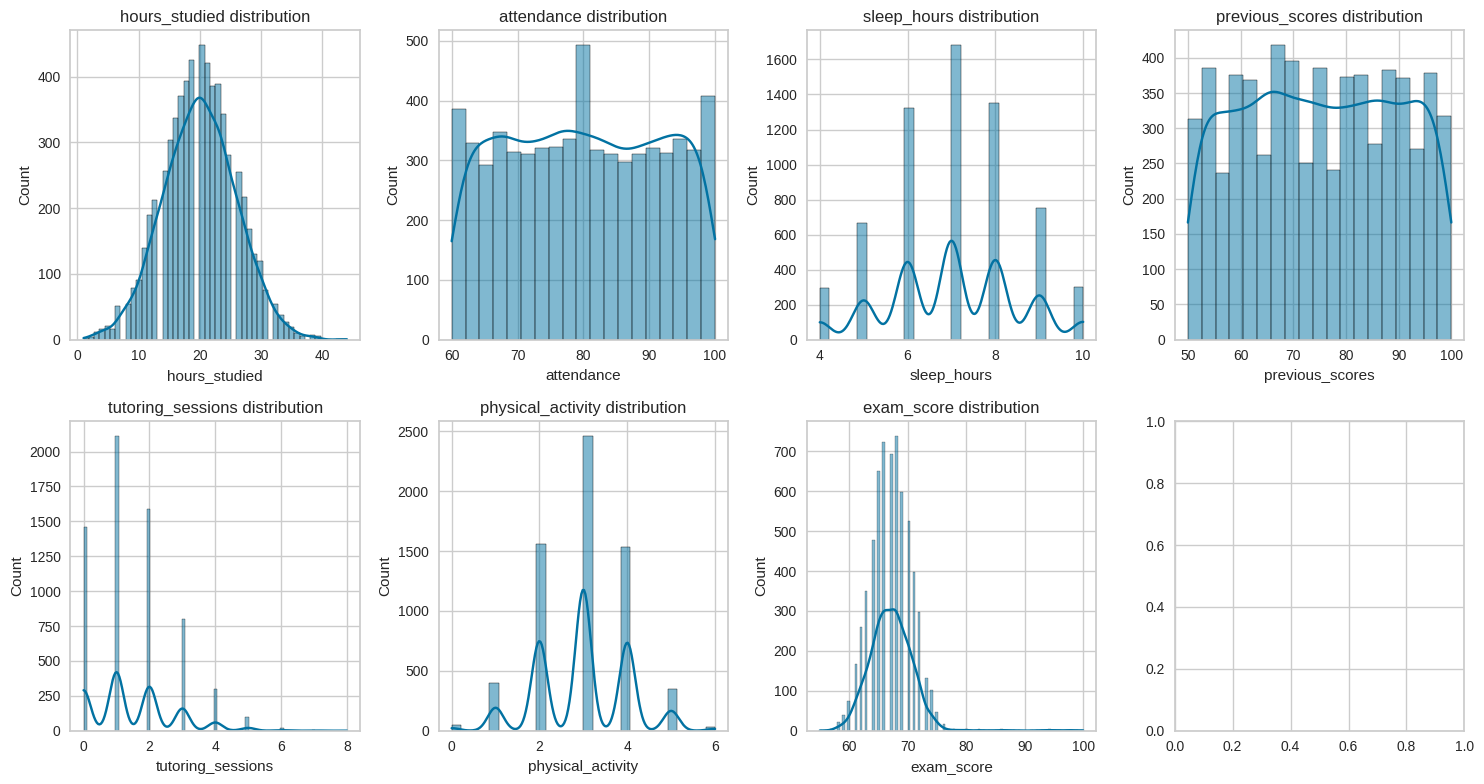

In [231]:
dist_plot(df_cleaned, numerical_cols)

<Axes: >

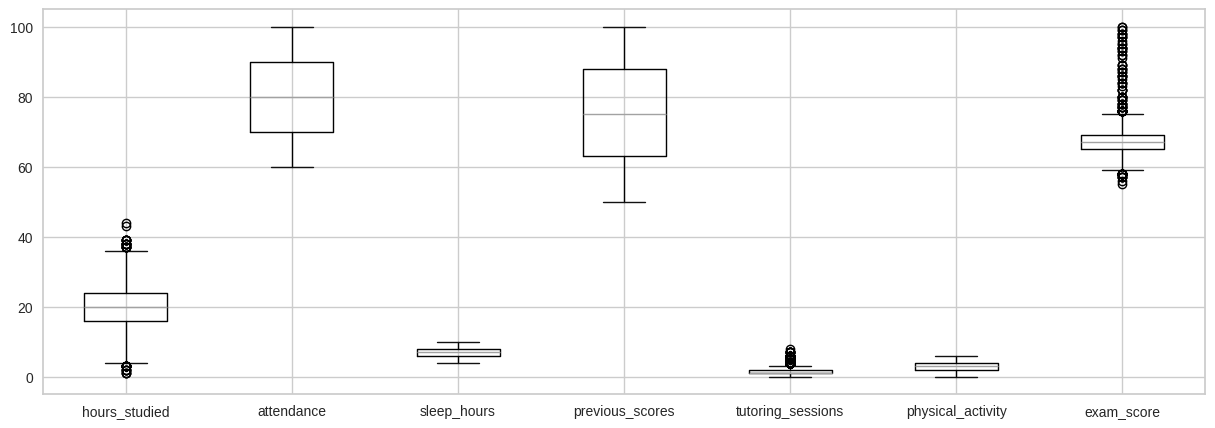

In [232]:
# Looking for numerical features to be scaled
plt.figure(figsize=(15,5))
df_cleaned[numerical_cols].boxplot()

Boxplot above shows that the features has a lot of outliers. means the data is more skewed. <br>
<br>
**STRATEGY**
- Standardize the data using StandardScaler to scale the values within a range of 0 to 1.

In [233]:
df_scaled = df_cleaned.copy()
scaler = MinMaxScaler()
df_scaled[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])
df_scaled[numerical_cols]

,hours_studied,attendance,sleep_hours,previous_scores,tutoring_sessions,physical_activity,exam_score
0,0.511628,0.600,0.500000,0.46,0.000,0.500000,0.266667
1,0.418605,0.100,0.666667,0.18,0.250,0.666667,0.133333
2,0.534884,0.950,0.500000,0.82,0.250,0.666667,0.422222
3,0.651163,0.725,0.666667,0.96,0.125,0.666667,0.355556
4,0.418605,0.800,0.333333,0.30,0.375,0.666667,0.333333
...,...,...,...,...,...,...,...
6602,0.558140,0.225,0.500000,0.52,0.125,0.333333,0.288889
6603,0.511628,0.400,0.666667,0.62,0.375,0.333333,0.311111
6604,0.441860,0.750,0.333333,0.30,0.375,0.333333,0.288889
6605,0.209302,0.650,0.333333,0.82,0.250,0.500000,0.288889


Numerical Distribution after scaling


<Axes: >

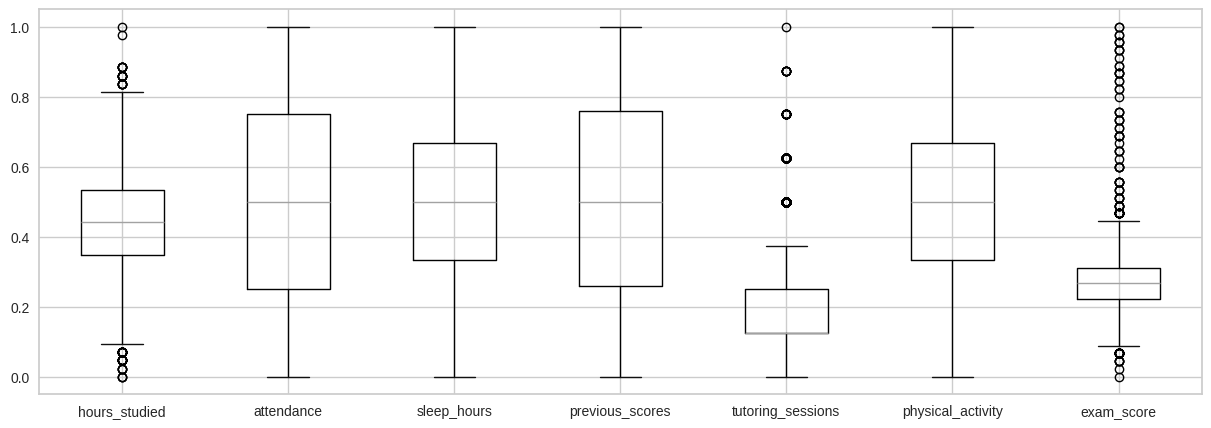

In [234]:
# Looking for numerical features to be scaled
print(f'Numerical Distribution after scaling')
plt.figure(figsize=(15,5))
df_scaled[numerical_cols].boxplot()

## **5.3. Handling Outliers**

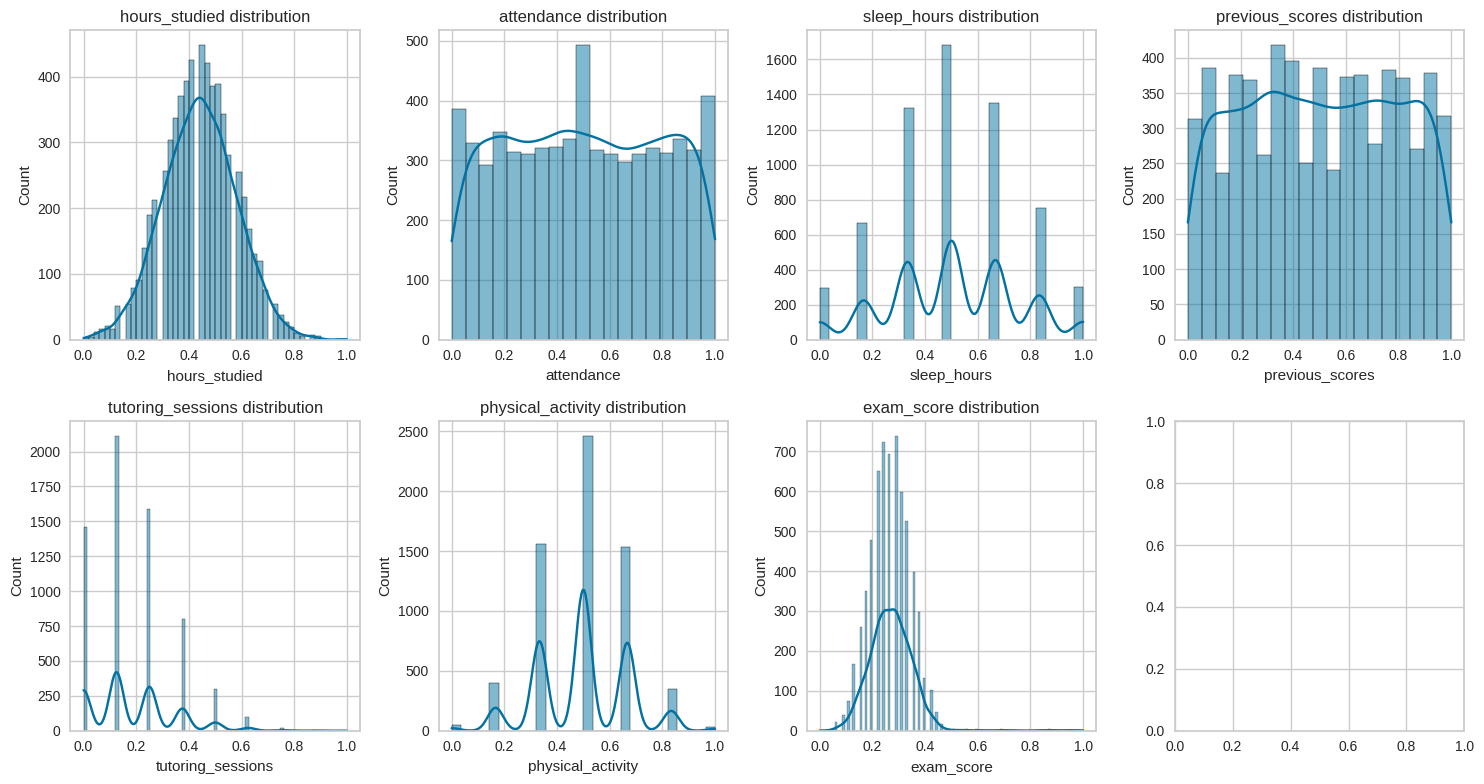

In [235]:
dist_plot(df_scaled, numerical_cols)

In [236]:
df_scaled[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
hours_studied,6378.0,0.441328,0.139197,0.0,0.348837,0.441860,0.534884,1.0
attendance,6378.0,0.500521,0.288768,0.0,0.250000,0.500000,0.750000,1.0
sleep_hours,6378.0,0.505827,0.244672,0.0,0.333333,0.500000,0.666667,1.0
previous_scores,6378.0,0.501323,0.288008,0.0,0.260000,0.500000,0.760000,1.0
tutoring_sessions,6378.0,0.186912,0.154248,0.0,0.125000,0.125000,0.250000,1.0
physical_activity,6378.0,0.495453,0.171488,0.0,0.333333,0.500000,0.666667,1.0
exam_score,6378.0,0.272266,0.086953,0.0,0.222222,0.266667,0.311111,1.0


The distribution looks much better now, and if we look at the standard deviation is close to 1 means the data is more normal. but still have a lot of outliers. <br>

**STRATEGY**
- The outliers are would not to be removed, because it would remove some unique information such as the `exam_score` that greater than 80 is counted as outliers. but it's important information for model to recognize it.
- To handle this we would use the model that more robust with the outliers such as `DBSCAN` (Density-based spatial clustering) or `K-medoids` for Clustering and Random Forest `RF` or `SVM`

## **5.4 Encoding the categorical features**

In [237]:
df_scaled[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   parental_involvement         6378 non-null   object
 1   access_to_resources          6378 non-null   object
 2   extracurricular_activities   6378 non-null   object
 3   motivation_level             6378 non-null   object
 4   internet_access              6378 non-null   object
 5   family_income                6378 non-null   object
 6   teacher_quality              6378 non-null   object
 7   school_type                  6378 non-null   object
 8   peer_influence               6378 non-null   object
 9   learning_disabilities        6378 non-null   object
 10  parental_education_level     6378 non-null   object
 11  distance_from_home           6378 non-null   object
 12  gender                       6378 non-null   object
 13  hours_studied_indicator      6378 non-

In [238]:
df_scaled[categorical_cols].describe().T

,count,unique,top,freq
parental_involvement,6378,3,Medium,3251
access_to_resources,6378,3,Medium,3204
extracurricular_activities,6378,2,Yes,3807
motivation_level,6378,3,Medium,3237
internet_access,6378,2,Yes,5893
family_income,6378,3,Low,2582
teacher_quality,6378,3,Medium,3826
school_type,6378,2,Public,4434
peer_influence,6378,3,Positive,2553
learning_disabilities,6378,2,No,5710


Categorical columns indicate that some of the features has a nominal and ordinal types. to handle this we would do encoding with method as follows:
- For ordinal type such as `parental_involvement`, `access_to_resources`, `motivational_level`, `family_income`, `teacher_quality`, `parental_education_level`, `distance_from_home`, `hours_studied_indicator`, `exam_score_indicator`, `tutoring_sessions_indicator` would be an ordinal categories type. we would use `OrdinalEncoder`, because it encodes the order of the data.
- For nominal type such as `Extracurricular_activities`, `internet_access`, `school_type`, `peer_influence`, `learning_disabilities`, `gender` would be considered as nominal categories types. we would use `OneHotEncode`, because it incicates the category of the data.

In [239]:
ordinal_features = ['parental_involvement',
                    'access_to_resources',
                    'motivation_level',
                    'family_income',
                    'teacher_quality',
                    'parental_education_level',
                    'distance_from_home',
                    'hours_studied_indicator',
                    'exam_score_indicator',
                    'tutoring_sessions_indicator']

nominal_features = df_scaled[categorical_cols].columns.difference(ordinal_features).tolist()

print(f'ordinal_features: {ordinal_features}\n')
print(f'nominal_features: {nominal_features}')

ordinal_features: ['parental_involvement', 'access_to_resources', 'motivation_level', 'family_income', 'teacher_quality', 'parental_education_level', 'distance_from_home', 'hours_studied_indicator', 'exam_score_indicator', 'tutoring_sessions_indicator']

nominal_features: ['extracurricular_activities', 'gender', 'internet_access', 'learning_disabilities', 'peer_influence', 'school_type']


In [240]:
print(f'ordinal features before encoded: ')
df_encoded = df_scaled.copy()
df_encoded[ordinal_features].head()

ordinal features before encoded: 


,parental_involvement,access_to_resources,motivation_level,family_income,teacher_quality,parental_education_level,distance_from_home,hours_studied_indicator,exam_score_indicator,tutoring_sessions_indicator
0,Low,High,Low,Low,Medium,High School,Near,Medium,C,Low
1,Low,Medium,Low,Medium,Medium,College,Moderate,Medium,C,Low
2,Medium,Medium,Medium,Medium,Medium,Postgraduate,Near,Medium,B,Low
3,Low,Medium,Medium,Medium,Medium,High School,Moderate,Medium,B,Low
4,Medium,Medium,Medium,Medium,High,College,Near,Medium,B,Medium


In [241]:
print(f'Ordinal unique values: ')
for feat in ordinal_features:
    print(f'{feat} : {df_encoded[feat].unique()}')

Ordinal unique values: 
parental_involvement : ['Low' 'Medium' 'High']
access_to_resources : ['High' 'Medium' 'Low']
motivation_level : ['Low' 'Medium' 'High']
family_income : ['Low' 'Medium' 'High']
teacher_quality : ['Medium' 'High' 'Low']
parental_education_level : ['High School' 'College' 'Postgraduate']
distance_from_home : ['Near' 'Moderate' 'Far']
hours_studied_indicator : ['Medium' 'Low' 'High']
exam_score_indicator : ['C' 'B' 'D' 'A']
tutoring_sessions_indicator : ['Low' 'Medium' 'High']


The ordinal encoding should be done by the order, so that we have to declare the order of the categories. Each ordinal feature has their unique order, so that we have to declare the order for every ordinal features as follows:
1. **Class one**: ordinal features of`parental_involvement` ,`access_to_resources`, `motivation_level`, `family_income`, `teacher_quality`, `hours_studied_indicator`, `tutoring_sessions_indicator` would be an order of Low < Medium < High
2. **Class two**: The ordinal features of `parental_education_level` would be ordered by High School < College < Postgraduate.
3. **Class three**: The ordinal features of `distance_from_home` would be ordered by Near < Moderate < Far
4. **Class Four**: The ordinal features of `exam_score_indicator` would be ordered by D < C < B < A

In [242]:
# store each ordinal column classes
class_one_ordinal = [col for col in ordinal_features if 'Medium' in df_encoded[col].unique()]
class_two_ordinal = [col for col in ordinal_features if 'College' in df_encoded[col].unique()]
class_three_ordinal = [col for col in ordinal_features if 'Moderate' in df_encoded[col].unique()]
class_four_ordinal = [col for col in ordinal_features if 'B' in df_encoded[col].unique()]

ordinal_classes = [class_one_ordinal, class_two_ordinal, class_three_ordinal, class_four_ordinal]

# set categories in each ordinal class
categories = [
    ['Low', 'Medium', 'High'],
    ['High School', 'College', 'Postgraduate'],
    ['Near', 'Moderate', 'Far'],
    ['C', 'B', 'D', 'A']
]

print(f'Classes in ordinal features:')
for i, class_i in enumerate(ordinal_classes):
    print(f'class {i+1}: {class_i}\n values: {categories[i]}\n')

Classes in ordinal features:
class 1: ['parental_involvement', 'access_to_resources', 'motivation_level', 'family_income', 'teacher_quality', 'hours_studied_indicator', 'tutoring_sessions_indicator']
 values: ['Low', 'Medium', 'High']

class 2: ['parental_education_level']
 values: ['High School', 'College', 'Postgraduate']

class 3: ['distance_from_home']
 values: ['Near', 'Moderate', 'Far']

class 4: ['exam_score_indicator']
 values: ['C', 'B', 'D', 'A']



In [243]:
# Encode the classes
for i, class_i in enumerate(ordinal_classes):
    enc = OrdinalEncoder(categories=[categories[i]]*len(class_i), dtype=np.int64)
    df_encoded[class_i] = enc.fit_transform(df_encoded[class_i])

In [244]:
print(f'ordinal features after encoded: ')
df_encoded[ordinal_features].head()

ordinal features after encoded: 


,parental_involvement,access_to_resources,motivation_level,family_income,teacher_quality,parental_education_level,distance_from_home,hours_studied_indicator,exam_score_indicator,tutoring_sessions_indicator
0,0,2,0,0,1,0,0,1,0,0
1,0,1,0,1,1,1,1,1,0,0
2,1,1,1,1,1,2,0,1,1,0
3,0,1,1,1,1,0,1,1,1,0
4,1,1,1,1,2,1,0,1,1,1


To be compared, let's print the data before and after the encoding

In [245]:
df_cleaned[ordinal_features].head()

,parental_involvement,access_to_resources,motivation_level,family_income,teacher_quality,parental_education_level,distance_from_home,hours_studied_indicator,exam_score_indicator,tutoring_sessions_indicator
0,Low,High,Low,Low,Medium,High School,Near,Medium,C,Low
1,Low,Medium,Low,Medium,Medium,College,Moderate,Medium,C,Low
2,Medium,Medium,Medium,Medium,Medium,Postgraduate,Near,Medium,B,Low
3,Low,Medium,Medium,Medium,Medium,High School,Moderate,Medium,B,Low
4,Medium,Medium,Medium,Medium,High,College,Near,Medium,B,Medium


Now we've done the order encoding for all ordinal features, let's encode the nominal features

In [246]:
# iterate the nominal features
for col in nominal_features:
    dummies = pd.get_dummies(df_cleaned[col], dtype=int, prefix=col)
    df_encoded = pd.concat([df_encoded, dummies], axis=1)

In [247]:
df_encoded.drop(nominal_features, axis=1, inplace=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hours_studied                   6378 non-null   float64
 1   attendance                      6378 non-null   float64
 2   parental_involvement            6378 non-null   int64  
 3   access_to_resources             6378 non-null   int64  
 4   sleep_hours                     6378 non-null   float64
 5   previous_scores                 6378 non-null   float64
 6   motivation_level                6378 non-null   int64  
 7   tutoring_sessions               6378 non-null   float64
 8   family_income                   6378 non-null   int64  
 9   teacher_quality                 6378 non-null   int64  
 10  physical_activity               6378 non-null   float64
 11  parental_education_level        6378 non-null   int64  
 12  distance_from_home              6378 no

now we've done the encoding for all nominal features. shows that the columns are increased due to the one hot encoding in each nominal features. Now let's check the whole dataset

In [248]:
df_encoded.head()

,hours_studied,attendance,parental_involvement,access_to_resources,sleep_hours,previous_scores,motivation_level,tutoring_sessions,family_income,teacher_quality,...,gender_Male,internet_access_No,internet_access_Yes,learning_disabilities_No,learning_disabilities_Yes,peer_influence_Negative,peer_influence_Neutral,peer_influence_Positive,school_type_Private,school_type_Public
0,0.511628,0.600,0,2,0.500000,0.46,0,0.000,0,1,...,1,0,1,1,0,0,0,1,0,1
1,0.418605,0.100,0,1,0.666667,0.18,0,0.250,1,1,...,0,0,1,1,0,1,0,0,0,1
2,0.534884,0.950,1,1,0.500000,0.82,1,0.250,1,1,...,1,0,1,1,0,0,1,0,0,1
3,0.651163,0.725,0,1,0.666667,0.96,1,0.125,1,1,...,1,0,1,1,0,1,0,0,0,1
4,0.418605,0.800,1,1,0.333333,0.30,1,0.375,1,2,...,0,0,1,1,0,0,1,0,0,1


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [249]:
from sklearn.cluster import DBSCAN, KMeans

In [250]:
# Copy the dataframe for clustering
df_clustered = df_encoded.copy()
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hours_studied                   6378 non-null   float64
 1   attendance                      6378 non-null   float64
 2   parental_involvement            6378 non-null   int64  
 3   access_to_resources             6378 non-null   int64  
 4   sleep_hours                     6378 non-null   float64
 5   previous_scores                 6378 non-null   float64
 6   motivation_level                6378 non-null   int64  
 7   tutoring_sessions               6378 non-null   float64
 8   family_income                   6378 non-null   int64  
 9   teacher_quality                 6378 non-null   int64  
 10  physical_activity               6378 non-null   float64
 11  parental_education_level        6378 non-null   int64  
 12  distance_from_home              6378 no

In case we want to compare the performance of clustering of dataframe that contains categorical-based ***(numercial features converted from categorical)*** and numerical-based columns. So the strategy that well be used is:<br>
- Density-based clustering (DBSCAN) and kmeans would be used in this case
- The elbow method would be used to find the optimal number of clusters of kmeans model. KElbowVisualizer will be adopted to visualize the optimal number of clusters
- The evaluation will be based on silhouette score. The target score should be a minimum of 0.55

In [251]:
# redefine categorical-based column and numerical-based columns
categorical_based = df_clustered.select_dtypes(include=['int64']).columns
numerical_based = df_clustered.select_dtypes(include=['float64']).columns

In [252]:
from sklearn.metrics import silhouette_score
db = DBSCAN()
db.fit(df_clustered)
db_labels = db.labels_

n_cluster_db = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise_db = list(db_labels).count(-1)

kmeans = KMeans() # set the number of clusters according in the best score on dbscan model
kmeans.fit(df_clustered)

labels_kmeans = kmeans.labels_
n_cluster_kmeans = len(set(labels_kmeans)) - (1 if -1 in labels_kmeans else 0)
n_noise_kmeans = list(labels_kmeans).count(-1)

print(f'Estimated number of clusters dbscan: {n_cluster_db}')
print(f'Estimated number of noise dbscan: {n_cluster_db}')
print(f'Estimated number of clusters kmeans: {n_cluster_kmeans}')
print(f'Estimated number of noise kmeans: {n_noise_kmeans}')

Estimated number of clusters dbscan: 1
Estimated number of noise dbscan: 1
Estimated number of clusters kmeans: 8
Estimated number of noise kmeans: 0


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

We've got in previous the target score which 0.55 on `eps=3` and `min_samples=25` with the numerical-based dataset. We'll tune the hyperparameters of eps and min_samples to see if we can get a better score. Code above might take a 5-7 minutes to run. So Enjoy the coffee :)

In [253]:
print(f'silhoutte score dbscan: {silhouette_score(df_clustered, db_labels)}')
print(f'silhouette score kmeans: {silhouette_score(df_clustered, labels_kmeans)}')

silhoutte score dbscan: -0.16875074489307984
silhouette score kmeans: 0.0498712019167882


In [254]:

# Define the parameter grid
eps_values = [i for i in range(1, 10)]
min_samples_values = [i for i in range(1, 10)]

def tune_dbscan(df_clustered, eps_values, min_samples_values):
    start_time = time.time()
    best_score = -1
    best_params = None

    # Iterate over all combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            # Initialize and fit DBSCAN with current parameters
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(df_clustered)
            labels = dbscan.labels_

            # Check if there are at least 2 clusters to calculate silhouette score
            if len(set(labels)) > 1:
                score = silhouette_score(df_clustered, labels)

                # check if score greater than target threshold min_score=0.55
                if score > 0.54:
                    n_cluster_ = len(set(labels)) - (1 if -1 in labels else 0)
                    n_noise_ = list(labels).count(-1)

                    score = score
                    params = {'eps': eps, 'min_samples': min_samples}

                    print(f'----------------------------------------')
                    print(f"Estimated number of clusters: {n_cluster_}")
                    print(f"Estimated number of noise points: {n_noise_}")
                    print('score:', score)
                    print(f'params: {params}')

                # Check if the score is the greater than prev score, and store it as best_score
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}


    # Output the best parameters and the highest silhouette score
    print("Best Parameters:", best_params)
    print("Best Silhouette Score:", best_score)
    print("--- %s seconds ---" % (time.time() - start_time))

Above we've got the list of the parameters that achieve the threshold score obove 0.55. and the best parameters are `eps=3` and `min_samples=13` with score `0.5643`. However, the number of clusters estimated is 1, which whole records are considered as one cluster.<br>

However, the dataset does not represent the clustered data. We'll try to use the feature selection, to make a dataset more simple

Our kmeans models are also have a low target score even though we use the dataset of numerical_based index. We'll try to look up for the optimal number of cluster declared using the elbow method.

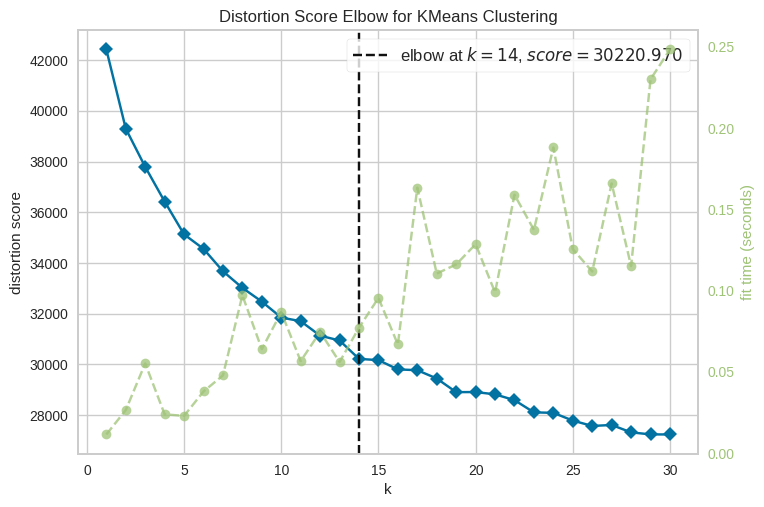

In [255]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
kemans_model = KMeans()
visualizer = KElbowVisualizer(kemans_model, k=(1,31))
visualizer.fit(df_clustered)  # Fit the data to the visualizer
visualizer.show()  # Finalize the plot
plt.show()

The visualization shows that the best `k_cluster` is 8 with WCSS score `61826.035`. we'll use that parameter and evaluate the silhouette score.

In [256]:
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(df_clustered)

kmeans_labels = kmeans.labels_
score = silhouette_score(df_clustered, kmeans_labels)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.05943911155917362


Anyway, kmeans models still have a low target score, However we do it with outliets data, which kmeans models doesn't have a capabilty to handle it. so we can chooce the DBSCAN model that we did in previous.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

To do feature selection we can try the following strategies:
1. Drop Features with High Multicollinearity
2. Drop Featrues with low variance
3. PCA (principle component analysis)

### C.1 Drop Features with low variance

<Axes: >

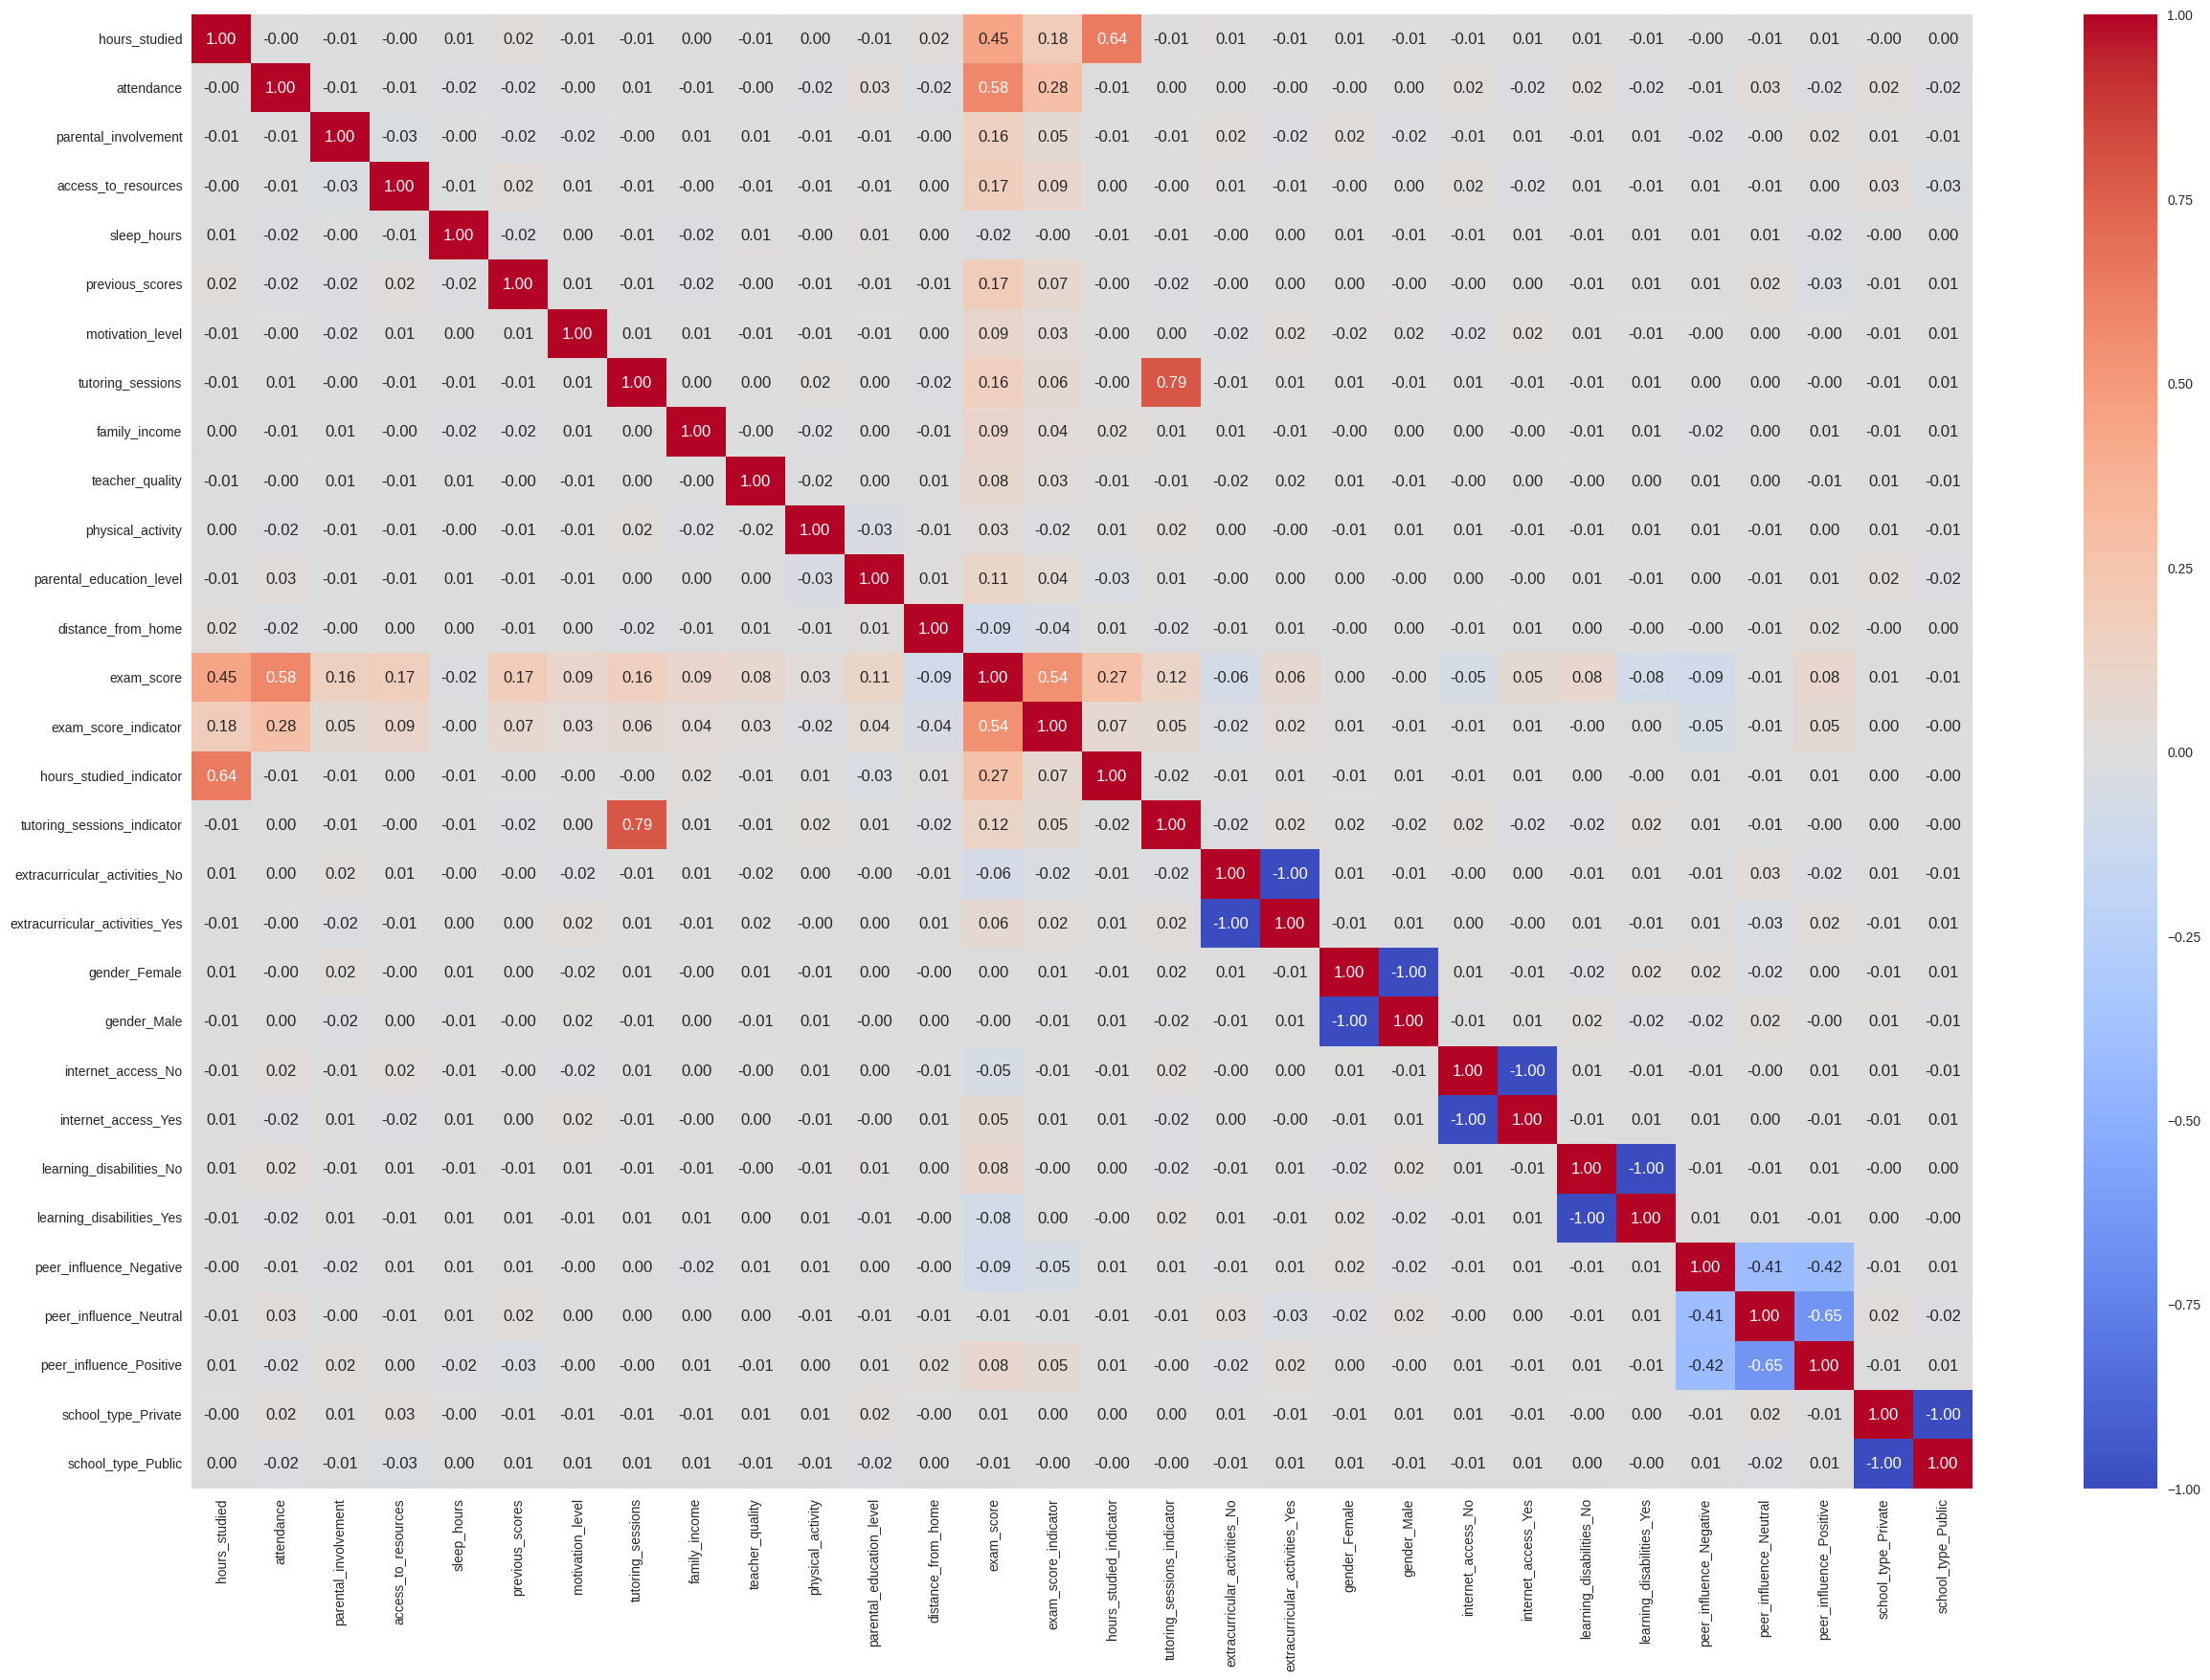

In [257]:
mat_corr = df_clustered.corr()
plt.figure(figsize=(30,20))
sns.heatmap(mat_corr, annot=True, fmt='.2f', cmap='coolwarm')

There is some features indicated as high correlation. we'll see further which one that we need to drop based on the lower variance of the features.

### C.3 Low Variance

**STRATEGY**
1. Sort the variance from highest to lowest
2. Drop the features with the low variance with threshold < 0.5

In [258]:
features_var = np.var(df_clustered, axis=0).sort_values(ascending=False)
features_var = pd.Series(features_var, index=df_clustered.columns).sort_values(ascending=False)
print(f'feature variances: ')
features_var

feature variances: 


,0
parental_education_level,0.609193
family_income,0.552745
access_to_resources,0.488015
motivation_level,0.484004
parental_involvement,0.482977
distance_from_home,0.449421
teacher_quality,0.361222
exam_score_indicator,0.302178
gender_Female,0.243879
gender_Male,0.243879


In [259]:
df_selected = df_clustered.loc[:, features_var > 0.5]
df_selected

,family_income,parental_education_level
0,0,0
1,1,1
2,1,2
3,1,0
4,1,1
...,...,...
6602,2,0
6603,0,0
6604,0,2
6605,0,0


Now we'll try to evaluate dbscan model with selected features

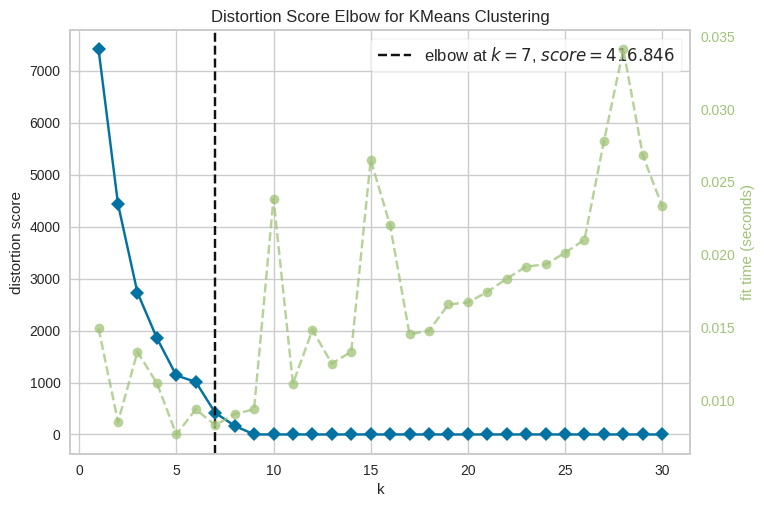

In [260]:
kmeans_selected = KMeans()
visualizer = KElbowVisualizer(kmeans_selected, k=(1,31))
visualizer.fit(df_selected)  # Fit the data to the visualizer
visualizer.show()  # Finalize the plot
plt.show()

In [261]:
def dbscan_kmeans_score(df, eps=0.5, min_samples=5, n_clusters=7, random_state=42):
    dbscan= DBSCAN()
    dbscan.fit(df)
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(df)

    dbscan_labels = dbscan.labels_
    kmeans_labels = kmeans.labels_

    n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise_dbscan = list(dbscan_labels).count(-1)

    n_clusters_kmeans = len(set(kmeans_labels)) - (1 if -1 in kmeans_labels else 0)
    n_noise_kmeans = list(kmeans_labels).count(-1)

    score_dbscan = silhouette_score(df, dbscan_labels)
    score_kmeans = silhouette_score(df, kmeans_labels)

    print(f'Estimated number of clusters dbscan: {n_clusters_dbscan}')
    print(f'Estimated number of noise points dbscan: {n_noise_dbscan}')


    print(f'Estimated number of clusters kmeans: {n_clusters_kmeans}')
    print(f'Estimated number of noise points kmeans: {n_noise_kmeans}')

    print(f'Silhouette Score dbscan: {score_dbscan}')
    print(f'Silhouette Score kmeans: {score_kmeans}')

    return dbscan, kmeans, dbscan_labels, kmeans_labels

In [262]:
dbscan_selected, kmeans_selected, dbscan_labels_selected, kmeans_labels_selected = dbscan_kmeans_score(df_selected, n_clusters=9, random_state=42)

Estimated number of clusters dbscan: 9
Estimated number of noise points dbscan: 0
Estimated number of clusters kmeans: 9
Estimated number of noise points kmeans: 0
Silhouette Score dbscan: 1.0
Silhouette Score kmeans: 1.0


Good score, we've got the 1.0 score of dbscan while kmeans is also good with 0.883 score. now let's try pca method

In [263]:
pca = PCA(n_components=2, random_state=42)
pca.fit(df_clustered)
pca.explained_variance_ratio_

array([0.09197134, 0.08360462])

In [264]:
df_reduced = pca.transform(df_clustered)
df_reduced = pd.DataFrame(df_reduced, columns=['pca_1', 'pca_2'])
df_reduced

,pca_1,pca_2
0,-0.742591,-0.862266
1,0.286848,0.021552
2,1.284559,0.257117
3,-0.645814,0.089913
4,0.330767,0.292363
...,...,...
6373,-0.733595,1.397235
6374,-0.747216,-0.572716
6375,1.281044,-0.827739
6376,-0.619716,-0.811963


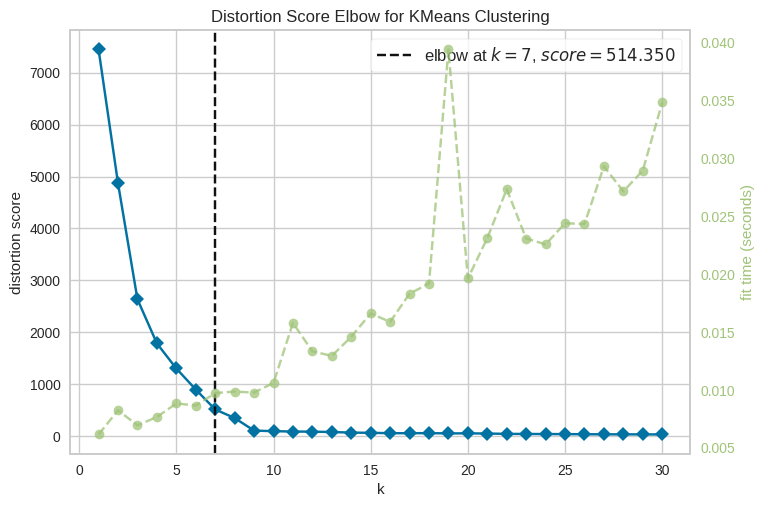

In [265]:
kmeans_reduced = KMeans()
visualizer = KElbowVisualizer(kmeans_reduced, k=(1,31))
visualizer.fit(df_reduced)  # Fit the data to the visualizer
visualizer.show()  # Finalize the plot
plt.show()

In [266]:
dbscan_selected, kmeans_selected, dbscan_labels_reduced, kmeans_labels_reduced= dbscan_kmeans_score(df_reduced, n_clusters=9, random_state=42)

Estimated number of clusters dbscan: 3
Estimated number of noise points dbscan: 0
Estimated number of clusters kmeans: 9
Estimated number of noise points kmeans: 0
Silhouette Score dbscan: 0.396072614692571
Silhouette Score kmeans: 0.8243008502890188


In [267]:
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
min_samples_values = [i for i in range(1, 20)]
tune_dbscan(df_reduced, eps_values, min_samples_values)

----------------------------------------
Estimated number of clusters: 16
Estimated number of noise points: 0
score: 0.6041006221246401
params: {'eps': 0.1, 'min_samples': 1}
----------------------------------------
Estimated number of clusters: 9
Estimated number of noise points: 7
score: 0.8230844862121117
params: {'eps': 0.1, 'min_samples': 2}
----------------------------------------
Estimated number of clusters: 9
Estimated number of noise points: 7
score: 0.8230844862121117
params: {'eps': 0.1, 'min_samples': 3}
----------------------------------------
Estimated number of clusters: 9
Estimated number of noise points: 7
score: 0.8230844862121117
params: {'eps': 0.1, 'min_samples': 4}
----------------------------------------
Estimated number of clusters: 9
Estimated number of noise points: 7
score: 0.8230844862121117
params: {'eps': 0.1, 'min_samples': 5}
----------------------------------------
Estimated number of clusters: 9
Estimated number of noise points: 8
score: 0.82291020334

In [268]:
dbscan_reduced = DBSCAN(eps=0.1, min_samples=2)
dbscan_reduced.fit(df_reduced)
dbscan_labels_reduced = dbscan_reduced.labels_
n_clusters = len(set(dbscan_labels_reduced)) - (1 if -1 in dbscan_labels_reduced else 0)
n_noise = list(dbscan_labels_reduced).count(-1)

score = silhouette_score(df_reduced, dbscan_labels_reduced)
print(f'Silhouette Score: {score}')
print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

Silhouette Score: 0.8230844862121117
Estimated number of clusters: 9
Estimated number of noise points: 7


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [269]:
df_reduced.head()

,pca_1,pca_2
0,-0.742591,-0.862266
1,0.286848,0.021552
2,1.284559,0.257117
3,-0.645814,0.089913
4,0.330767,0.292363


In [270]:
y_dbscan_reduced = dbscan_reduced.fit_predict(df_reduced)
dbscan_reduced_cluster = df_reduced.copy()
dbscan_reduced_cluster['cluster'] = y_dbscan_reduced
dbscan_reduced_cluster_mean = dbscan_reduced_cluster.groupby('cluster').mean().iloc[1:]

kmeans_reduced = KMeans(n_clusters=9, random_state=42)
y_kmeans_reduced = kmeans_reduced.fit_predict(df_reduced)
kmeans_reduced_cluster = df_reduced.copy()
kmeans_reduced_cluster['cluster'] = y_kmeans_reduced
kmeans_reduced_cluster_mean = kmeans_reduced_cluster.groupby('cluster').mean()

dbscan_reduced_cluster_mean, kmeans_reduced_cluster_mean

(            pca_1     pca_2
 cluster                    
 0       -0.716867 -0.768809
 1        0.298894  0.212243
 2        1.294688  0.190906
 3       -0.702388  0.219380
 4       -0.684837  1.207061
 5        1.281102 -0.799439
 6        0.317027  1.197503
 7        0.278579 -0.791572
 8        1.313679  1.180747,
             pca_1     pca_2
 cluster                    
 0       -0.716769 -0.768496
 1        0.299205  0.212053
 2        1.294688  0.190906
 3       -0.684142  1.207787
 4        0.278769 -0.791156
 5        1.281102 -0.799439
 6       -0.702388  0.219380
 7        0.317732  1.198370
 8        1.314596  1.181135)

In [271]:
y_dbscan_selected = dbscan_selected.fit_predict(df_selected)
dbscan_selected_cluster = df_selected.copy()
dbscan_selected_cluster['cluster'] = y_dbscan_selected
dbscan_selected_cluster_mean = dbscan_selected_cluster.groupby('cluster').mean()

y_kmeans_selected = kmeans_selected.fit_predict(df_selected)
kmeans_selected_cluster = df_selected.copy()
kmeans_selected_cluster['cluster'] = y_kmeans_selected
kmeans_selected_cluster_mean = kmeans_selected_cluster.groupby('cluster').mean()

dbscan_selected_cluster_mean, kmeans_selected_cluster_mean

(         family_income  parental_education_level
 cluster                                         
 0                  0.0                       0.0
 1                  1.0                       1.0
 2                  1.0                       2.0
 3                  1.0                       0.0
 4                  2.0                       0.0
 5                  0.0                       2.0
 6                  2.0                       1.0
 7                  0.0                       1.0
 8                  2.0                       2.0,
          family_income  parental_education_level
 cluster                                         
 0                  0.0                       0.0
 1                  1.0                       2.0
 2                  1.0                       0.0
 3                  0.0                       1.0
 4                  2.0                       0.0
 5                  0.0                       2.0
 6                  1.0                       1.0

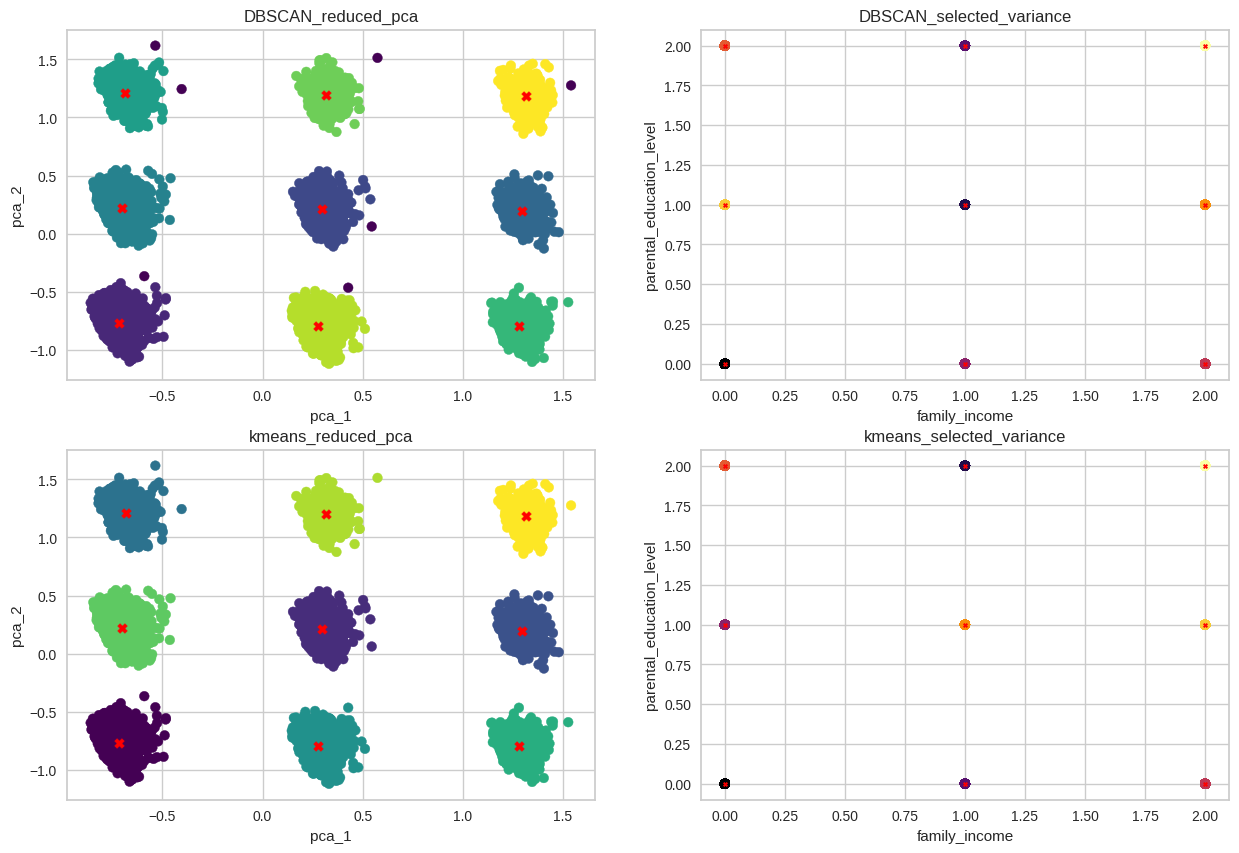

In [272]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

axes[0].scatter(df_reduced['pca_1'], df_reduced['pca_2'], c=dbscan_labels_reduced, cmap='viridis')
axes[0].scatter(dbscan_reduced_cluster_mean['pca_1'], dbscan_reduced_cluster_mean['pca_2'], c='red', cmap='viridis', marker='X')
axes[0].set_xlabel('pca_1')
axes[0].set_ylabel('pca_2')
axes[0].set_title('DBSCAN_reduced_pca')

axes[1].scatter(df_selected['family_income'], df_selected['parental_education_level'], c=dbscan_labels_selected, cmap='inferno')
axes[1].scatter(dbscan_selected_cluster_mean['family_income'], dbscan_selected_cluster_mean['parental_education_level'], c='red', cmap='inferno', marker='X', s=10)
axes[1].set_xlabel('family_income')
axes[1].set_ylabel('parental_education_level')
axes[1].set_title('DBSCAN_selected_variance')

axes[2].scatter(df_reduced['pca_1'], df_reduced['pca_2'], c=kmeans_labels_reduced, cmap='viridis')
axes[2].scatter(kmeans_reduced_cluster_mean['pca_1'], kmeans_reduced_cluster_mean['pca_2'], c='red', cmap='viridis', marker='X')
axes[2].set_xlabel('pca_1')
axes[2].set_ylabel('pca_2')
axes[2].set_title('kmeans_reduced_pca')

axes[3].scatter(df_selected['family_income'], df_selected['parental_education_level'], c=kmeans_labels_selected, cmap='inferno')
axes[3].scatter(kmeans_selected_cluster_mean['family_income'], kmeans_selected_cluster_mean['parental_education_level'], c='red', cmap='inferno', marker='X', s=10)
axes[3].set_xlabel('family_income')
axes[3].set_ylabel('parental_education_level')
axes[3].set_title('kmeans_selected_variance')

plt.show()

We have found 9 clusters of reduced features from pca, and selected features from variance. Both shows the good score of clustering. However, PCA is harder to interpret than variance. Which is why we choose variance-based clustering. From that, we have `family income` and `parental education level` as features and `kmeans` as a model.

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [273]:
kmeans_selected_cluster_mean['family_income'] = kmeans_selected_cluster_mean['family_income'].apply(
    lambda x: 'Low' if x == 0.0 else 'Medium' if x == 1.0 else 'High'
)

kmeans_selected_cluster_mean['parental_education_level'] = kmeans_selected_cluster_mean['parental_education_level'].apply(
    lambda x: 'High School' if x == 0.0 else 'College' if x == 1.0 else 'Postgraduate'
)

kmeans_selected_cluster_mean

,family_income,parental_education_level
cluster,,
0,Low,High School
1,Medium,Postgraduate
2,Medium,High School
3,Low,College
4,High,High School
5,Low,Postgraduate
6,Medium,College
7,High,College
8,High,Postgraduate


In [274]:
df_labeled = df_cleaned.copy()
df_labeled['cluster'] = y_kmeans_selected
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   hours_studied                6378 non-null   int64 
 1   attendance                   6378 non-null   int64 
 2   parental_involvement         6378 non-null   object
 3   access_to_resources          6378 non-null   object
 4   extracurricular_activities   6378 non-null   object
 5   sleep_hours                  6378 non-null   int64 
 6   previous_scores              6378 non-null   int64 
 7   motivation_level             6378 non-null   object
 8   internet_access              6378 non-null   object
 9   tutoring_sessions            6378 non-null   int64 
 10  family_income                6378 non-null   object
 11  teacher_quality              6378 non-null   object
 12  school_type                  6378 non-null   object
 13  peer_influence               6378 non-

In [275]:
cluster_analysis = df_labeled.groupby('cluster').agg({
    'exam_score' : ['mean', 'max', 'min'],
    'attendance' : ['mean', 'max', 'min'],
    'cluster' : 'count'
})

cluster_analysis.columns = ['_'.join(col).strip() for col in cluster_analysis.columns.values]
for col in ['exam_score_mean', 'attendance_mean']:
  cluster_analysis[col] = cluster_analysis[col].round(3)

cluster_analysis.rename(columns={'cluster_count': 'Frekuensi'}, inplace=True)
cluster_analysis

,exam_score_mean,exam_score_max,exam_score_min,attendance_mean,attendance_max,attendance_min,Frekuensi
cluster,,,,,,,
0,66.496,97,55,79.925,100,60,1286
1,67.900,93,58,79.706,100,60,521
2,67.045,99,57,79.644,100,60,1254
3,66.860,94,56,79.888,100,60,784
4,67.417,100,59,79.591,100,60,619
5,67.740,95,57,81.461,100,60,512
6,67.539,98,58,80.351,100,60,791
7,68.041,100,60,80.148,100,60,364
8,68.607,98,61,80.360,100,60,247


Tulis hasil interpretasinya di sini.
1. Cluster 0:
    - ****Family_income**** = Low
    - ****Parental_education_level**** = Postgraduate
    - **Rata-rata exam score** = 66,496
    - **Rata-rata attendance** = 79,925
    - **Frekuensi** = 1286
    - **Analisis**: Kluster 1 memiliki nilai **family_income** yang rendah dan **parental_education_level** yang tinggi (postgraduate). Kemungkinan demografi pada siswa ini memungkinan tidak seimbangnya antara akonomi dan pencapaian pada pendidikannya, atau seorang orang tua yang lebih memfokuskan edukasi yang tinggi dari pada income yang tinggi.
2. Cluster 1:
    - ****Family_income**** = Medium
    - ****Parental_education_level**** = High School
    - **Rata-rata exam score** = 67.900
    - **Rata-rata attendance** = 79.706
    - **Frekuensi** = 521
    - **Analisis** = Kluster 2 memiliki nilai **family_income** yang tinggi dan **parental_education_level** yang tinggi (high school). Siswa ini memiliki keluarga yang mungkin memiliki kemampuan teknikal yang dapat meningkatkan income dan kestabilan ekonominya.
3. Cluster 2:
    - ****Family_income**** = High
    - **Parental_education_level** = College
    - **Rata-rata exam score** = 67.045
    - **Rata-rata attendance** = 79.644
    - **Frekuensi** = 1254
    - **Analisis** =  Kluster ini merepresentasikan keluarga yang memiliki income tinggi dan kemampuan intelektual yang tinggi. Sehingga dapat pekerjaan yang layak sesuai dari jurusan pendidikan yang diampu, seperti: management, engineering, atau spesialis.
4. Cluster 3:
    - **Family_income** = Low
    - **Parental_education_level** = High school
    - **Rata-rata exam score** = 66.860
    - **Rata-rata attendance** = 79.888
    - **Frekuensi** = 784
    - **Analisis** =  Kluster yang mempresentasikan keluarga dengan pemasukan yang rendah dan tingkat pendidikan yang rendah. Hal itu dapat mengindikasikan kelemahan ekonomi dan terbatasnya lapangan pekerjaan yang tersedia.
5. Cluster 4:
    - **Family_income** = Medium
    - **Parental_education_level** = College
    - **Rata-rata exam score** = 67.417
    - **Rata-rata attendance** = 79.591
    - **Frekuensi** = 619
    - **Analisis** = Kluster merepresentasikan potensial dari middle-class dimana yang dapat gaji yang stabil, pekerjaan ini seperti, guru atau Professional tingkat pemula
6. Cluster 5:
    - **Family_income** = Low
    - **Parental_education_level** = College
    - **Rata-rata exam score** = 67.740
    - **Rata-rata attendance** = 81.461
    - **Frekuensi** = 512
    - **Analisis**  Kluster ini menggambarkan, walau orang tua yang memiliki pendidikan yang tinggi, kluster ini memungkinkan underemployment, dimana pekerjaan yang mereka dapat tidak sesuai dengan gelar pendidikan yang didapatkan, atau mereka tinggal di wilayah yang pendapatan daerahnya rendah.
7. Cluster 6:
    - **Family_income** = High
    - **Parental_education_level** = High School
    - **Rata-rata exam score** = 67.539
    - **Rata-rata attendance** = 80.351
    - **Frekuensi** = 791
    - **Analisis** Kluster ini meskipun mempunyai pendidikan yang rendah, akan tetapi mempunyai income yang tinggi, ini memungkinkan seorang pengusaha, mempunyai warisan, atau kemampuan dalam berdagang yang tidak dimiliki oleh seorang yang pendidikan tinggi
8. Cluster 7:
    - **Family_income** = Medium
    - **Parental_education_level** = Postgraduate
    - **Rata-rata exam score** = 68.041
    - **Rata-rata attendance** = 80.148
    - **Frekuensi** = 364
    - **Analisis** = Kelompok ini mencakup keluarga dengan pendapatan sedang dan pendidikan pascasarjana. Ini mungkin menunjukkan profesi di bidang pendidikan, penelitian, atau layanan publik, yang sering kali memerlukan gelar lanjutan tetapi tidak selalu menawarkan gaji tinggi.
9. Cluster 8:
    - **Family_income** = High
    - **Parental_education_level** = Postgraduate
    - **Rata-rata exam score** = 68.607
    - **Rata-rata attendance** = 80.360
    - **Frekuensi** = 247
    - **Analisis** = Kelompok ini kemungkinan besar terdiri dari keluarga yang berpendidikan tinggi dan berpenghasilan tinggi. Orang tua dalam kelompok ini mungkin memiliki profesi bergengsi atau bergaji tinggi, seperti dokter, pengacara, atau eksekutif perusahaan.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [282]:
df_labeled.to_csv('data-labeled.csv')

In [283]:
from google.colab import files
files.download('data-labeled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>